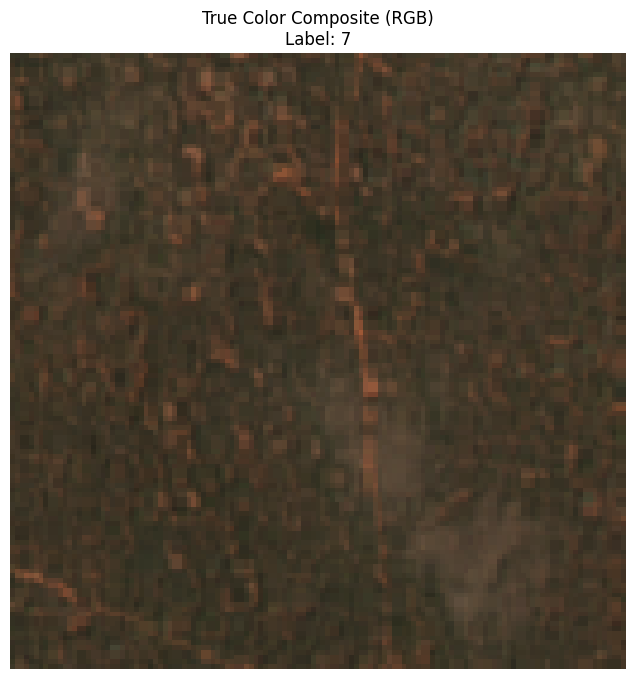

This is what your eyes would see from space!


In [29]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

# --- CONFIGURATION ---
# Use the local path you confirmed works!
data_path = '/Users/abhicado/Library/CloudStorage/GoogleDrive-agoda.wonders@gmail.com/My Drive/CS6140_Project_Data/*.tfrecord.gz'
files = glob.glob(data_path)

feature_description = {
    'B2': tf.io.VarLenFeature(tf.float32),  # Blue
    'B3': tf.io.VarLenFeature(tf.float32),  # Green
    'B4': tf.io.VarLenFeature(tf.float32),  # Red
    'classification': tf.io.FixedLenFeature([], tf.float32),
}

def parse_tfrecord(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)

raw_dataset = tf.data.TFRecordDataset(files[400], compression_type='GZIP')
raw_dataset = raw_dataset.shuffle(raw_dataset.cardinality())
parsed_dataset = raw_dataset.map(parse_tfrecord)

for features in parsed_dataset.take(1):
    label = int(features['classification'].numpy())

    # 1. Extract the 3 visible bands
    b4 = tf.sparse.to_dense(features['B4']).numpy() # Red
    b3 = tf.sparse.to_dense(features['B3']).numpy() # Green
    b2 = tf.sparse.to_dense(features['B2']).numpy() # Blue

    # 2. Reshape them (assuming 129x129)
    side = int(np.sqrt(len(b4)))
    r = b4.reshape((side, side))
    g = b3.reshape((side, side))
    b = b2.reshape((side, side))

    # 3. Stack them into an RGB image
    # We normalize by dividing by 3000 (Satellite data is usually 0-10000, but visuals clip around 3000)
    rgb = np.dstack((r, g, b)) / 2000.0 
    
    # Clip values to 0-1 range to avoid matplotlib errors
    rgb = np.clip(rgb, 0, 1)

    # 4. Show the "Human View"
    plt.figure(figsize=(8,8))
    plt.imshow(rgb)
    plt.title(f"True Color Composite (RGB)\nLabel: {label}")
    plt.axis('off')
    plt.show()
    
    

    print("This is what your eyes would see from space!")